In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate 
from scipy import stats

In [17]:
#Data import
#Dowloading the data files was a challenge. All .tab files which would not load into jupyter. 
#I tried delimeter = /t, which was recommended online, but this did not work. I also went through many other variations none of them worked either. 
#I went to office hours and settled on converting into a excel file and then downloading as a csv. Thank you Jackson!
#Also there was no need for linear regression as all data was collected over the period of a year and averaged, so seasonal variation was already taken into account, and there was not an abundace of data points

file_diatom ='diatom_data.csv'
file_so4 = 'so4_data.csv'
file_geochem = 'baikal_geochem.csv'

dia_df = pd.read_csv(file_diatom)
display(dia_df)

so4_df = pd.read_csv(file_so4)
display(so4_df)

geochem_df = pd.read_csv(file_geochem)
display(geochem_df)


,Depth sed [m],Age [ka BP],Age [a AD/CE],A. baicalensis [%],A. skvortzowii [%],Synedra spp. [%],C. minuta [%],C. inconspicua [%],S. meyeri [%],TDVA [10**6 #/g],DDI,Reference
0,0.0010,-0.063,2013,33.44,8.85,13.44,27.87,0.00,0.33,3.5288,0.19,Roberts et al (2018)
1,0.0030,-0.061,2011,33.66,8.82,17.65,26.80,0.00,0.33,3.1649,0.20,Roberts et al (2018)
2,0.0050,-0.059,2009,34.05,9.26,11.57,30.74,0.00,0.66,1.7890,0.19,Roberts et al (2018)
3,0.0070,-0.056,2006,27.50,13.42,12.11,31.42,0.65,0.00,1.4893,0.16,Roberts et al (2018)
4,0.0090,-0.053,2003,25.40,10.36,13.59,25.89,0.00,2.27,2.5340,0.21,Roberts et al (2018)
5,0.0110,-0.048,1998,33.77,10.87,6.59,40.53,0.00,0.00,2.7790,0.22,Roberts et al (2018)
6,0.0127,-0.044,1994,33.85,11.50,5.75,31.64,4.42,2.88,0.9847,0.63,Mackay et al (1998)
7,0.0130,-0.043,1993,31.68,13.53,6.44,29.04,0.99,1.32,4.1937,0.20,Roberts et al (2018)
8,0.0140,-0.040,1990,36.20,13.29,7.77,26.38,2.86,4.91,2.0257,0.57,Mackay et al (1998)
9,0.0150,-0.037,1987,33.39,12.33,11.13,26.03,1.37,3.08,3.4299,0.17,Roberts et al (2018)


,Depth water [m],Date/Time,Date/time end,[SO4]2- [mg/l]
0,0,1967,1968,3.9
1,10,1967,1968,4.4
2,25,1967,1968,4.1
3,50,1967,1968,3.8
4,100,1967,1968,3.9
...,...,...,...,...
72,800,2004,2005,5.5
73,900,2004,2005,6.2
74,1000,2004,2005,5.7
75,1100,2004,2005,5.6


,Date/Time,Date/time end,Depth top [m],Depth bot [m],[SO4]2- [mg/l],SO4 std dev [¬±],SPM [mg/l],Std dev [¬±] (in suspended matter),Chl a [¬µg/l],Chl a std dev [¬±],...,N org [¬µg/l] (in unfiltered water),N org std dev [¬±],PON [¬µg/l] (in suspended matter),N org std dev [¬±] (PON),P-[PO4]3- [¬µg/l],P std dev [¬±],P org [¬µg/l] (in unfiltered water),P org std dev [¬±] (in unfiltered water),POP [¬µg/l] (in suspended matter),"P org std dev [¬±] (POP, in suspended matter)"
0,1967,1969,0,1300,3.9,1.2,0.53,0.10,NaN,NaN,...,81,7,NaN,NaN,11.0,1.0,4.0,1.0,0.75,0.50
1,1982,1984,0,1300,4.6,0.6,0.48,0.11,0.19,0.15,...,63,30,5.3,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,1986,1989,0,1300,6.5,2.2,0.57,0.16,0.16,0.11,...,103,50,25.0,24.0,10.0,2.0,9.0,3.0,1.92,0.95
3,2004,2005,0,1300,5.7,1.5,0.36,0.14,0.40,0.21,...,99,58,41.0,27.0,10.0,2.0,9.0,3.0,2.70,1.80


In [18]:
#Cutting the diatom measurements down to match the dates of the sulfate measurements, to make the figure more clear
dia_df_short = dia_df.loc[dia_df["Age [a AD/CE]"] > 1960]
display(dia_df_short)

#Cutting down diatom measurements down to match the dates of the geochem measurements, for the same reason as above 
dia_df_geo = dia_df.loc[dia_df["Age [a AD/CE]"] < 2004]
dia_df_geochem = dia_df_geo.loc[dia_df_geo["Age [a AD/CE]"] > 1967]

#Averaging the sulfate concetration measurement to be from 0-200m, the photic layer, so only the sulfate concentration affecting the diatoms is shown
#Separating the orginal df to only include up to 200m
so4_df = so4_df.loc[so4_df['Depth water [m]'] < 201]
display(so4_df)

#Split each time period into chunks and then averaged the sulfate concentration
#I also struggled with averaging only specific depth values for sulfate concentrations. 
#I tried to do this within the dataframe, but kept running into errors. 
#Decided to take the long route and split the original data up into seperate arrays and then combining them into a new dataframe. 
so4_avg1 = so4_df['[SO4]2- [mg/l]'].loc[0:5].mean()
so4_avg2 = so4_df['[SO4]2- [mg/l]'].loc[17:22].mean()
so4_avg3 = so4_df['[SO4]2- [mg/l]'].loc[28:33].mean()
so4_avg4 = so4_df['[SO4]2- [mg/l]'].loc[44:49].mean()
so4_avg5 = so4_df['[SO4]2- [mg/l]'].loc[61:].mean()

#Created a new array with averaged so4 concentrations and respective dates
so4conc = np.array([[1967, so4_avg1], [1981, so4_avg2], [1983, so4_avg3], [1986, so4_avg4], [2004, so4_avg5]])

#Turned that array into a dataframe ready to be plotted
so4_final = pd.DataFrame(so4conc, columns =['Date Start', 'Average [SO4]2- [mg/l]'])
display(so4_final)

,Depth sed [m],Age [ka BP],Age [a AD/CE],A. baicalensis [%],A. skvortzowii [%],Synedra spp. [%],C. minuta [%],C. inconspicua [%],S. meyeri [%],TDVA [10**6 #/g],DDI,Reference
0,0.0010,-0.063,2013,33.44,8.85,13.44,27.87,0.00,0.33,3.5288,0.19,Roberts et al (2018)
1,0.0030,-0.061,2011,33.66,8.82,17.65,26.80,0.00,0.33,3.1649,0.20,Roberts et al (2018)
2,0.0050,-0.059,2009,34.05,9.26,11.57,30.74,0.00,0.66,1.7890,0.19,Roberts et al (2018)
3,0.0070,-0.056,2006,27.50,13.42,12.11,31.42,0.65,0.00,1.4893,0.16,Roberts et al (2018)
4,0.0090,-0.053,2003,25.40,10.36,13.59,25.89,0.00,2.27,2.5340,0.21,Roberts et al (2018)
5,0.0110,-0.048,1998,33.77,10.87,6.59,40.53,0.00,0.00,2.7790,0.22,Roberts et al (2018)
6,0.0127,-0.044,1994,33.85,11.50,5.75,31.64,4.42,2.88,0.9847,0.63,Mackay et al (1998)
7,0.0130,-0.043,1993,31.68,13.53,6.44,29.04,0.99,1.32,4.1937,0.20,Roberts et al (2018)
8,0.0140,-0.040,1990,36.20,13.29,7.77,26.38,2.86,4.91,2.0257,0.57,Mackay et al (1998)
9,0.0150,-0.037,1987,33.39,12.33,11.13,26.03,1.37,3.08,3.4299,0.17,Roberts et al (2018)


,Depth water [m],Date/Time,Date/time end,[SO4]2- [mg/l]
0,0,1967,1968,3.9
1,10,1967,1968,4.4
2,25,1967,1968,4.1
3,50,1967,1968,3.8
4,100,1967,1968,3.9
5,200,1967,1968,3.8
17,0,1981,1982,4.8
18,10,1981,1982,4.8
19,25,1981,1982,4.9
20,50,1981,1982,5.3


,Date Start,Average [SO4]2- [mg/l]
0,1967.0,3.983333
1,1981.0,4.983333
2,1983.0,4.900000
3,1986.0,6.933333
4,2004.0,5.566667


In [19]:
#Indexing all needed variables for conciseness
geochem_si = geochem_df['Si [mg/l] (Si-SiO2)']
geochem_toc = geochem_df['TOC [mg/l] (in unfiltered water)']
geochem_poc = geochem_df['POC [¬µg/l] (in suspended matter)']
geochem_norg = geochem_df['N org [¬µg/l] (in unfiltered water)']
geochem_p = geochem_df['P org [¬µg/l] (in unfiltered water)']
geochem_pon = geochem_df['PON [¬µg/l] (in suspended matter)']
geochem_pop = geochem_df['POP [¬µg/l] (in suspended matter)']
geochem_dates = geochem_df['Date/Time']
dia_geo = dia_df_geochem['TDVA [10**6 #/g]']
dia_dates_geo = dia_df_geochem['Age [a AD/CE]']

so4_final_date = so4_final['Date Start']
so4_final_conc = so4_final['Average [SO4]2- [mg/l]']

dates_dia = dia_df_short['Age [a AD/CE]']
dia_tot = dia_df_short['TDVA [10**6 #/g]']

dia_ab = dia_df_short['A. baicalensis [%]']
dia_as = dia_df_short['A. skvortzowii [%]']
dia_ss = dia_df_short['Synedra spp. [%]']
dia_cm = dia_df_short['C. minuta [%]']
dia_ci = dia_df_short['C. inconspicua [%]']
dia_sm = dia_df_short['S. meyeri [%]']

#Interpolating missing values, to get a better view of how each has changed over time

#A. skvortzowii
dia_inds = np.where(dia_df['A. skvortzowii [%]'].notnull()) 
x = dia_df.loc[dia_inds, 'Age [a AD/CE]']
y = dia_df.loc[dia_inds, 'A. skvortzowii [%]']
func = interpolate.interp1d(x, y, kind='linear', fill_value = 'extrapolate')
#Adding new interpolated values as a column and set new variable
dia_df['as_interp'] = func(dia_df['Age [a AD/CE]'])
display(dia_df)
dia_interp_short = dia_df.loc[dia_df["Age [a AD/CE]"] > 1960]
dia_as_interp = dia_interp_short['as_interp']

#Organic phosphorous
porg_inds = np.where(geochem_df['P org [¬µg/l] (in unfiltered water)'].notnull()) 
x = geochem_df.loc[porg_inds, 'Date/Time']
y = geochem_df.loc[porg_inds, 'P org [¬µg/l] (in unfiltered water)']
func = interpolate.interp1d(x, y, kind='linear', fill_value = 'extrapolate')
#Adding new interpolated values as a column and set new variable
geochem_df['porg_interp'] = func(geochem_df['Date/Time'])
porg_interp = geochem_df['porg_interp']

#Particulte organic phosphorous
pop_inds = np.where(geochem_df['POP [¬µg/l] (in suspended matter)'].notnull()) 
x = geochem_df.loc[pop_inds, 'Date/Time']
y = geochem_df.loc[pop_inds, 'POP [¬µg/l] (in suspended matter)']
func = interpolate.interp1d(x, y, kind='linear', fill_value = 'extrapolate')
#Adding new interpolated values as a column and set new variable
geochem_df['pop_interp'] = func(geochem_df['Date/Time'])
pop_interp = geochem_df['pop_interp']

#Silicon
si_inds = np.where(geochem_df['Si [mg/l] (Si-SiO2)'].notnull()) 
x = geochem_df.loc[si_inds, 'Date/Time']
y = geochem_df.loc[si_inds, 'Si [mg/l] (Si-SiO2)']
func = interpolate.interp1d(x, y, kind='linear', fill_value = 'extrapolate')
#Adding new interpolated values as a column and set new variable
geochem_df['si_interp'] = func(geochem_df['Date/Time'])
si_interp = geochem_df['si_interp']
display(geochem_df)

,Depth sed [m],Age [ka BP],Age [a AD/CE],A. baicalensis [%],A. skvortzowii [%],Synedra spp. [%],C. minuta [%],C. inconspicua [%],S. meyeri [%],TDVA [10**6 #/g],DDI,Reference,as_interp
0,0.0010,-0.063,2013,33.44,8.85,13.44,27.87,0.00,0.33,3.5288,0.19,Roberts et al (2018),8.850000
1,0.0030,-0.061,2011,33.66,8.82,17.65,26.80,0.00,0.33,3.1649,0.20,Roberts et al (2018),8.820000
2,0.0050,-0.059,2009,34.05,9.26,11.57,30.74,0.00,0.66,1.7890,0.19,Roberts et al (2018),9.260000
3,0.0070,-0.056,2006,27.50,13.42,12.11,31.42,0.65,0.00,1.4893,0.16,Roberts et al (2018),13.420000
4,0.0090,-0.053,2003,25.40,10.36,13.59,25.89,0.00,2.27,2.5340,0.21,Roberts et al (2018),10.360000
5,0.0110,-0.048,1998,33.77,10.87,6.59,40.53,0.00,0.00,2.7790,0.22,Roberts et al (2018),10.870000
6,0.0127,-0.044,1994,33.85,11.50,5.75,31.64,4.42,2.88,0.9847,0.63,Mackay et al (1998),11.500000
7,0.0130,-0.043,1993,31.68,13.53,6.44,29.04,0.99,1.32,4.1937,0.20,Roberts et al (2018),13.530000
8,0.0140,-0.040,1990,36.20,13.29,7.77,26.38,2.86,4.91,2.0257,0.57,Mackay et al (1998),13.290000
9,0.0150,-0.037,1987,33.39,12.33,11.13,26.03,1.37,3.08,3.4299,0.17,Roberts et al (2018),12.330000


,Date/Time,Date/time end,Depth top [m],Depth bot [m],[SO4]2- [mg/l],SO4 std dev [¬±],SPM [mg/l],Std dev [¬±] (in suspended matter),Chl a [¬µg/l],Chl a std dev [¬±],...,N org std dev [¬±] (PON),P-[PO4]3- [¬µg/l],P std dev [¬±],P org [¬µg/l] (in unfiltered water),P org std dev [¬±] (in unfiltered water),POP [¬µg/l] (in suspended matter),"P org std dev [¬±] (POP, in suspended matter)",porg_interp,pop_interp,si_interp
0,1967,1969,0,1300,3.9,1.2,0.53,0.10,NaN,NaN,...,NaN,11.0,1.0,4.0,1.0,0.75,0.50,4.000000,0.750000,1.340000
1,1982,1984,0,1300,4.6,0.6,0.48,0.11,0.19,0.15,...,3.7,NaN,NaN,NaN,NaN,NaN,NaN,7.947368,1.673684,1.395263
2,1986,1989,0,1300,6.5,2.2,0.57,0.16,0.16,0.11,...,24.0,10.0,2.0,9.0,3.0,1.92,0.95,9.000000,1.920000,1.410000
3,2004,2005,0,1300,5.7,1.5,0.36,0.14,0.40,0.21,...,27.0,10.0,2.0,9.0,3.0,2.70,1.80,9.000000,2.700000,1.060000


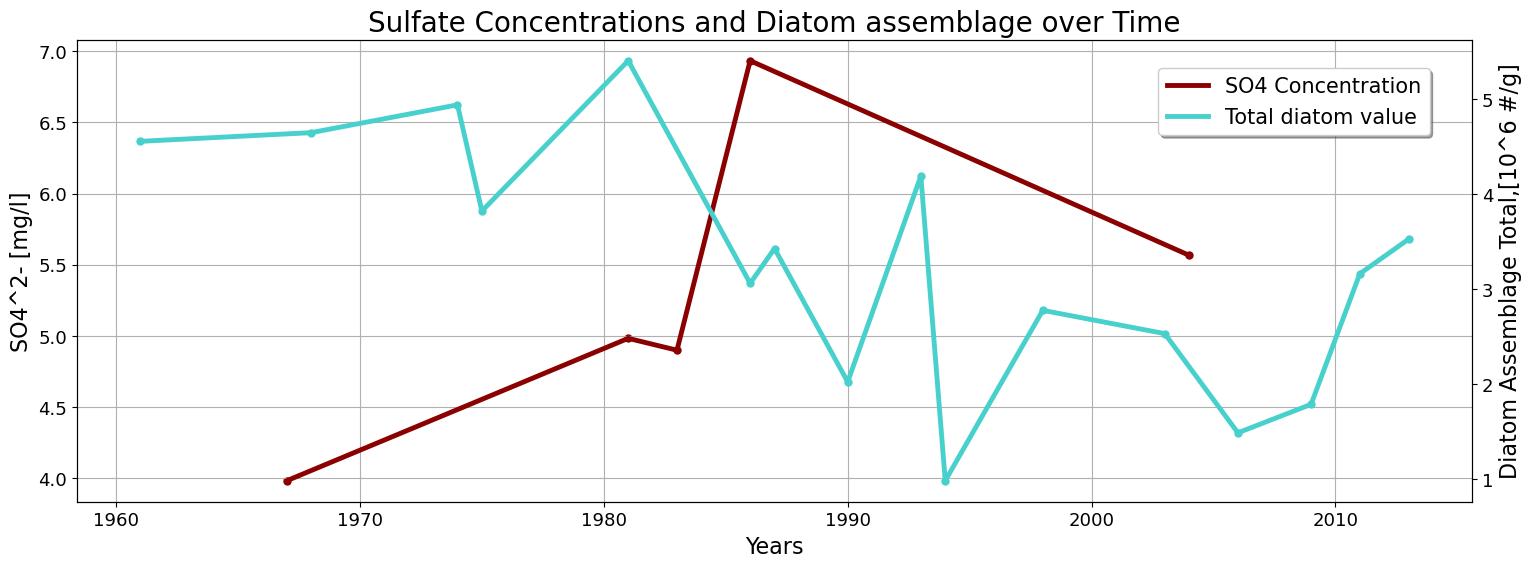

In [20]:
#Plotting sulate concentration vs total diatom assemblage
fig,ax = plt.subplots(figsize=(18,6))

#Found resource for adding two y axes here: https://www.statology.org/matplotlib-two-y-axes/
ax2 = ax.twinx()

#Plotting sulfate concentration and total diatom assemblage data over time to see their relationship.
ax2.plot(dates_dia, dia_tot, c='mediumturquoise', linestyle='-', linewidth=3.5, marker=None, label= 'Total diatom value')
ax.plot(so4_final_date, so4_final_conc, c='darkred', linestyle='-', linewidth=3.5, marker=None,label = 'SO4 Concentration')

ax2.scatter(dates_dia, dia_tot, s=25, c='mediumturquoise')
ax.scatter(so4_final_date, so4_final_conc, s=25, c='darkred')

ax.grid()

#Managing settings for axes
ax.set_title('Sulfate Concentrations and Diatom assemblage over Time', fontsize=20)
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('SO4^2- [mg/l]', fontsize=16)
ax2.set_ylabel('Diatom Assemblage Total,[10^6 #/g]', fontsize=16)
#Used this website to change axis tick labels fontsize: https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
ax.tick_params(axis='x', labelsize = 13)
ax.tick_params(axis='y', labelsize = 13)
ax2.tick_params(axis='y', labelsize = 13)

fig.legend(loc ='upper left', shadow = True, bbox_to_anchor=(0.72, 0.85), fontsize= 15)

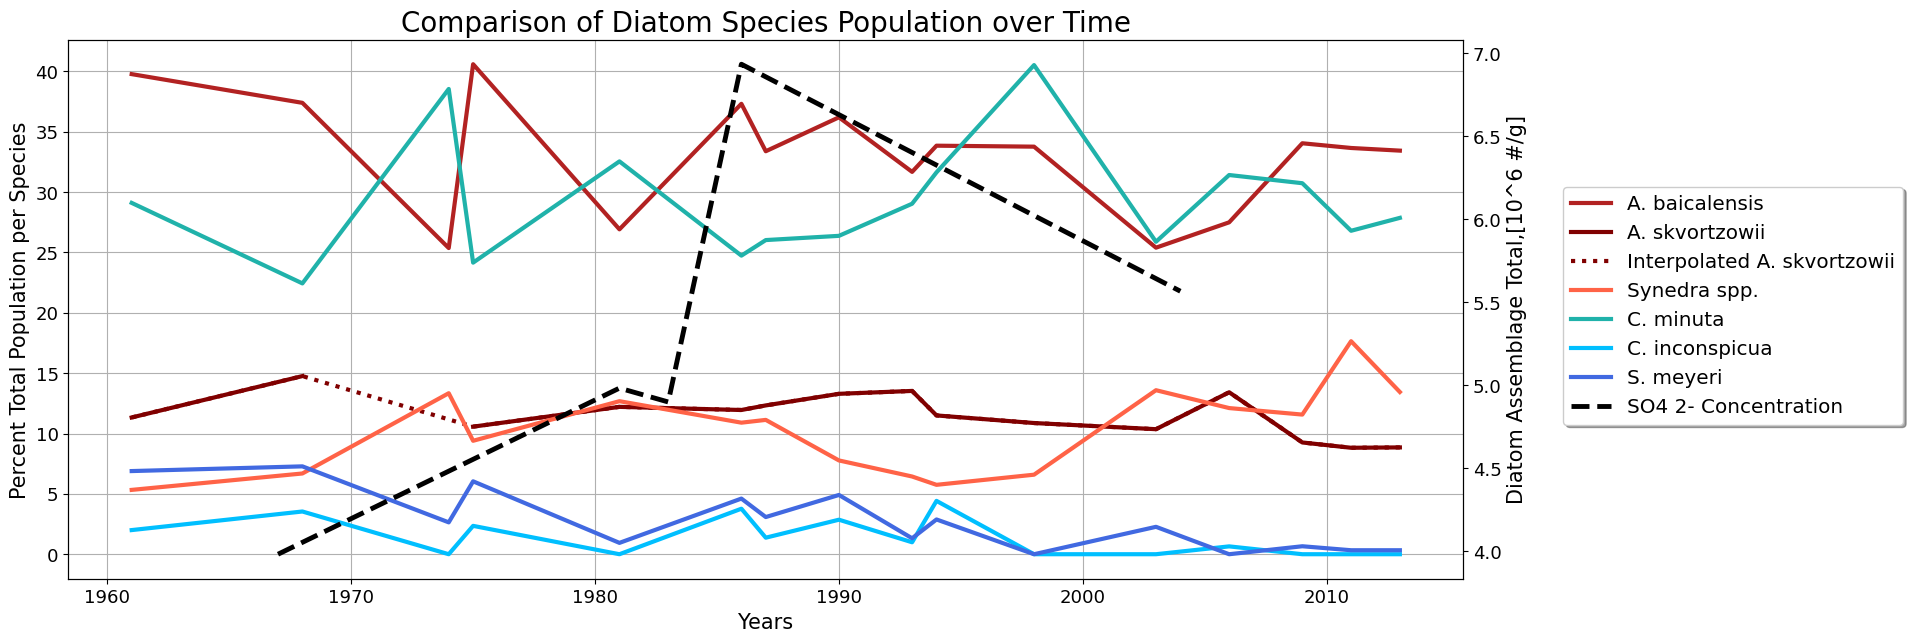

In [21]:
#Plotting each diatom species and sulfate concentration over time
fig,ax = plt.subplots(figsize=(18,7))

#Found resource for adding two y axes here: https://www.statology.org/matplotlib-two-y-axes/
ax2 = ax.twinx()

#Plotting each species and sulfate concentration to compare changes over time, and if some species are more sensative to sulfate
#Struggled with finding enough variations in colors to still be accessible, as there are many different values plotted
#For plotting graphs, I did this before we learned how functions work so at that point I was not able to streamline my subplot code.
ax.plot(dates_dia, dia_ab, c='firebrick', linestyle='-', linewidth=3, marker=None, label= 'A. baicalensis')
ax.plot(dates_dia, dia_as, c='maroon', linestyle='-', linewidth=3, marker=None, label= 'A. skvortzowii')
ax.plot(dates_dia, dia_as_interp, c='maroon', linestyle=':', linewidth=3, marker=None, label= 'Interpolated A. skvortzowii')
ax.plot(dates_dia, dia_ss, c='tomato', linestyle='-', linewidth=3, marker=None, label= 'Synedra spp.')
ax.plot(dates_dia, dia_cm, c='lightseagreen', linestyle='-', linewidth=3, marker=None, label= 'C. minuta')
ax.plot(dates_dia, dia_ci, c='deepskyblue', linestyle='-', linewidth=3, marker=None, label= 'C. inconspicua')
ax.plot(dates_dia, dia_sm, c='royalblue', linestyle='-', linewidth=3, marker=None, label= 'S. meyeri')

ax2.plot(so4_final_date, so4_final_conc, c='k', linestyle='--', linewidth=3.5, marker=None,label = 'SO4 2- Concentration')

ax.grid()

#Managing settings for axes
ax.set_title('Comparison of Diatom Species Population over Time', fontsize=20)
ax.set_xlabel('Years', fontsize=15)
ax2.set_ylabel('Diatom Assemblage Total,[10^6 #/g]', fontsize=15)
ax.set_ylabel('Percent Total Population per Species', fontsize=15)
#used this website to change axis tick labels fontsize: https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
ax.tick_params(axis='x', labelsize = 13)
ax.tick_params(axis='y', labelsize = 13)
ax2.tick_params(axis='y', labelsize = 13)

#Found resource for moving legend outside of graph here: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot 
fig.legend(loc='center left', bbox_to_anchor=(0.95, 0.5), shadow=True, fontsize='x-large')

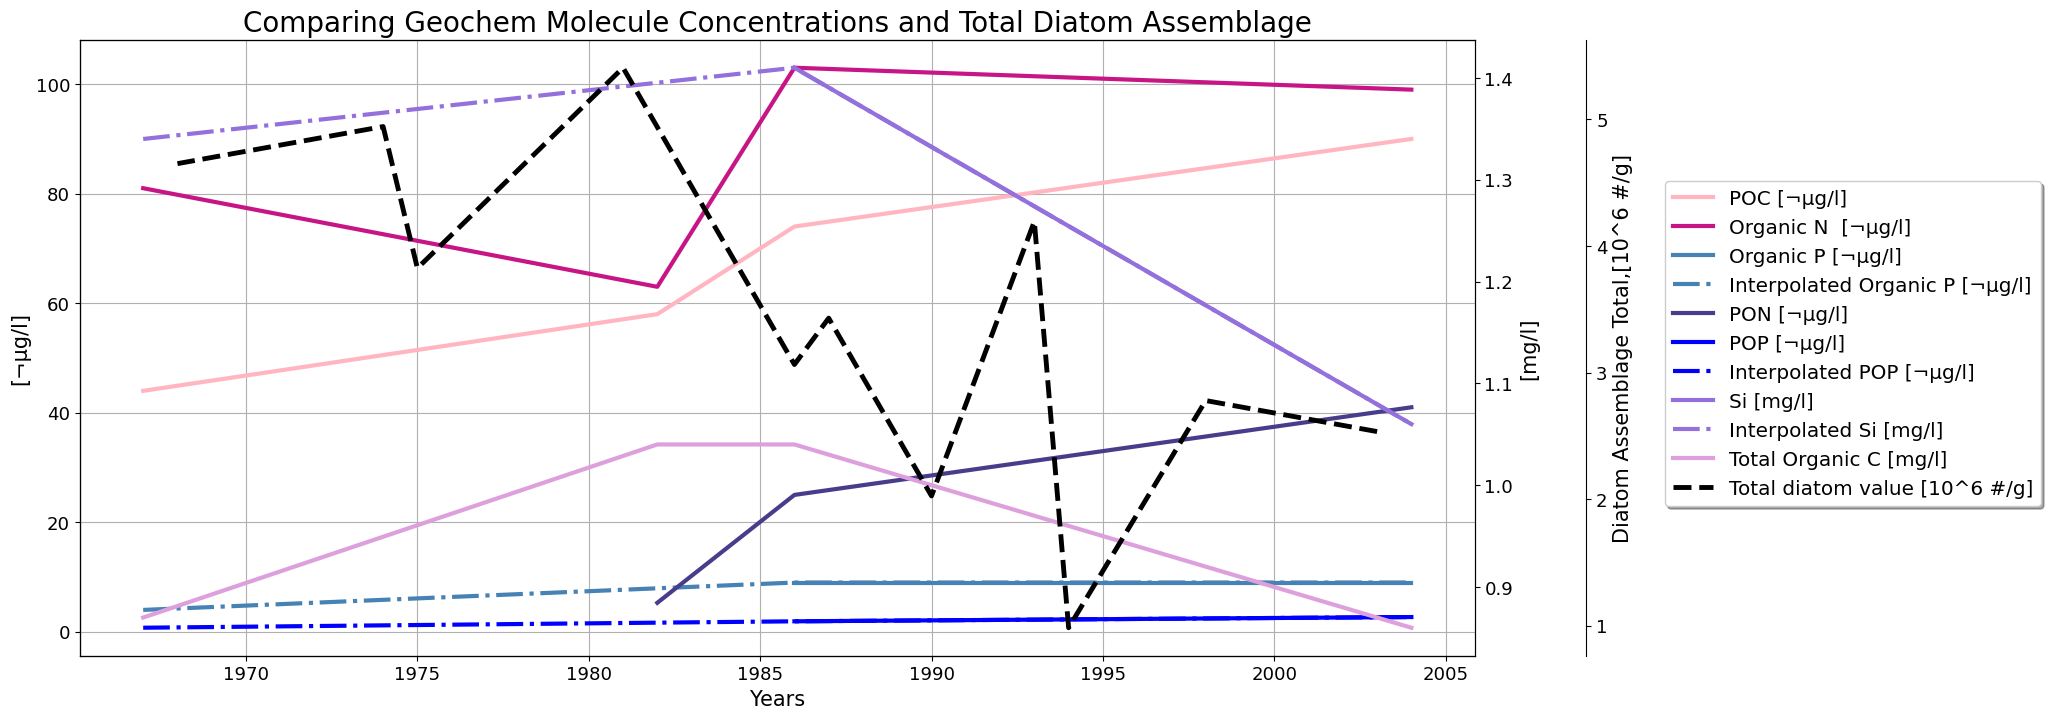

In [23]:
#Plotting each measurement and total diatom assemblage over time
fig,ax = plt.subplots(figsize=(18,8))

#Found resource for adding three y axes here: https://www.statology.org/matplotlib-two-y-axes/
#Each for a different unit
ax2 = ax.twinx()
ax3 = ax.twinx()
#Used this for offsetting the third y axis: https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
ax3.spines.right.set_position(("axes", 1.08))

#Plotting different chemical and particulate compositions to see if those may be what is affecting total diatom population as well
#Again struggled with finding enough variations in colors to still be accessible, as there are many different values plotted
#For plotting graphs, I did this before we learned how functions work so at that point I was not able to streamline my subplot code.

ax.plot(geochem_dates, geochem_poc, c='lightpink', linestyle='-', linewidth=3, marker=None, label= 'POC [¬µg/l]')
ax.plot(geochem_dates, geochem_norg, c='mediumvioletred', linestyle='-', linewidth=3, marker=None, label= 'Organic N  [¬µg/l]')
ax.plot(geochem_dates, geochem_p, c='steelblue', linestyle='-', linewidth=3, marker=None, label= 'Organic P [¬µg/l]')
ax.plot(geochem_dates, porg_interp, c='steelblue', linestyle='-.', linewidth=3, marker=None, label= 'Interpolated Organic P [¬µg/l]')
ax.plot(geochem_dates, geochem_pon, c='darkslateblue', linestyle='-', linewidth=3, marker=None, label= 'PON [¬µg/l]')
ax.plot(geochem_dates, geochem_pop, c='blue', linestyle='-', linewidth=3, marker=None, label= 'POP [¬µg/l]')
ax.plot(geochem_dates, pop_interp, c='blue', linestyle='-.', linewidth=3, marker=None, label= 'Interpolated POP [¬µg/l]')

ax2.plot(geochem_dates, geochem_si, c='mediumpurple', linestyle='-', linewidth=3, marker=None, label= 'Si [mg/l]')
ax2.plot(geochem_dates, si_interp, c='mediumpurple', linestyle='-.', linewidth=3, marker=None, label= 'Interpolated Si [mg/l]')
ax2.plot(geochem_dates, geochem_toc, c='plum', linestyle='-', linewidth=3, marker=None, label= 'Total Organic C [mg/l]')

ax3.plot(dia_dates_geo, dia_geo, c='k', linestyle='--', linewidth=3.5, marker=None, label= 'Total diatom value [10^6 #/g]')

ax.grid()

#Managing settings for axes
ax.set_title('Comparing Geochem Molecule Concentrations and Total Diatom Assemblage', fontsize=20)
ax.set_xlabel('Years', fontsize=15)
ax2.set_ylabel('[mg/l]', fontsize=15)
ax3.set_ylabel('Diatom Assemblage Total,[10^6 #/g]', fontsize=15)
ax.set_ylabel('[¬µg/l]', fontsize=15)
#used this website to change axis tick labels fontsize: https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
ax.tick_params(axis='x', labelsize = 13)
ax.tick_params(axis='y', labelsize = 13)
ax2.tick_params(axis='y', labelsize = 13)
ax3.tick_params(axis='y', labelsize = 13)

#Found resource for moving legend outside of graph here: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot 
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')